In [68]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [69]:
body = State(R=1000,
             L=0,
             E=0,
             V=1)

system = System(gamma=1.36, #per day
                mu=1.36e-3,
                tau=0.2,
                beta=0.00027,
                p=0.1,
                alpha=3.6e-2,
                sigma=2,
                delta=0.33,
                pi=100)

,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
p,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000


In [70]:
def update_R(state, system,in_day):
    dR = (gamma/in_day * tau/in_day) - (mu/in_day * state.R) - (beta/in_day * state.R * state.V)
    return dR + state.R

def update_L(state, system,in_day):
    dL = (p * beta/in_day * state.R * state.V) - (mu/in_day * state.L) - (alpha/in_day * state.L)
    return dL + state.L

def update_E(state, system,in_day):
    dE = ((1 - p) * beta/in_day * state.R * state.V) + (alpha/in_day * state.L) - (delta/in_day * state.E)
    return dE + state.E

def update_V(state, system,in_day):
    dV = (pi/in_day * state.E) - (sigma/in_day * state.V)
    return dV + state.V

def update_body(state, system,in_day):    
 
    for i in range(in_day):
        nr = update_R(state, system, in_day)
        nl = update_L(state, system, in_day)
        ne = update_E(state, system, in_day)
        nv = update_V(state, system, in_day)
        state = State(R=nr, L=nl, E=ne, V=nv)
    
    return State(R=nr, L=nl, E=ne, V=nv)

In [71]:
def run_simulation(state, system, update_func, days, steps_per_day):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, days):
        frame.row[t + 1] = update_func(frame.row[t], system, steps_per_day)
    
    return frame

,R,L,E,V
0,1000,0,0,1
1,997.297,0.133204,1.11834,19.1784
2,938.021,5.87001,49.0889,857.421
3,159.495,82.2683,651.592,17672.5
4,0.11232,94.7003,580.527,30068.4
5,9.10634e-05,91.2384,420.263,24443.8
6,3.67048e-05,87.8926,304.869,18075.1
7,4.90229e-05,84.6695,221.812,13177.8
8,6.55364e-05,81.5646,162.006,9609.84
9,8.67999e-05,78.5735,118.918,7034.35


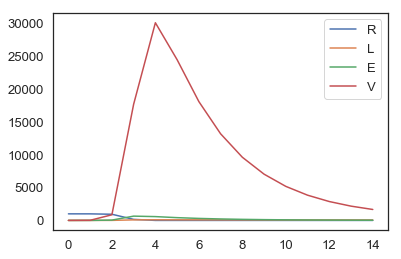

In [72]:
sim=run_simulation(body, system, update_body, 14,24*60)
sim.plot()
sim
